# 11.3 Case Study: Taxi Ride Fares
Name: Joi Chu-Ketterer <br>Date: 11/8/19<br>Course: DSC550 - Data Mining

In [1]:
import pandas as pd #let's me import the data into a dataframe
import numpy as np #allows me to create arrays from the data
import matplotlib.pyplot as plt #allows me to make graphs
from geopy import distance #allows me to calculate geographical distances

In [2]:
taxi = pd.read_csv('taxi.csv')

In [3]:
taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
taxi.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
# this allows me to calculate the distances between pickup and dropoff 

pick_lat = list(taxi['pickup_latitude'])
pick_long = list(taxi['pickup_longitude'])
drop_lat = list(taxi['dropoff_latitude'])
drop_long = list(taxi['dropoff_longitude'])

pick_up = list(zip(pick_lat, pick_long))
drop_off = list(zip(drop_lat, drop_long))
combined = list(zip(pick_up, drop_off))

distance_list = []

for x in combined:
    try:
        item = distance.distance(x[0], x[1]).miles
    except:
        item = 0
    
    distance_list.append(item)

/Users/jckett/anaconda3/lib/python3.7/site-packages/geopy/point.py:405: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


In [6]:
# once calculated, the values are added to the dataframe as a new column

taxi['distance'] = distance_list

In [7]:
# a similar approach is used to extract the month, day, and hour from pickup_datetime
# this will make it more useful for predictions

date = list(taxi['pickup_datetime'])

month = []
day = []
hour = []

for x in date:
    try:
        segment = x[5:7]
    except:
        segment = 0

    month.append(segment)
    
for x in date:
    try:
        segment = x[8:10]
    except:
        segment = 0

    day.append(segment)
    
for x in date:
    try:
        segment = x[11:13]
    except:
        segment = 0

    hour.append(segment)
    

# this creates a new column in the dataframe for each extracted attribute

taxi['month'] = month
taxi['day'] = day
taxi['hour'] = hour

In [8]:
taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,month,day,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,06,15,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,01,05,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,08,18,00
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,04,21,04
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.241710,03,09,07


In [9]:
# to preserve the dataset in case I need to go back to it later, I am making a copy 
# I will use the copy dataframe moving forward

taxi_new = taxi

Text(0, 0.5, 'Frequency')

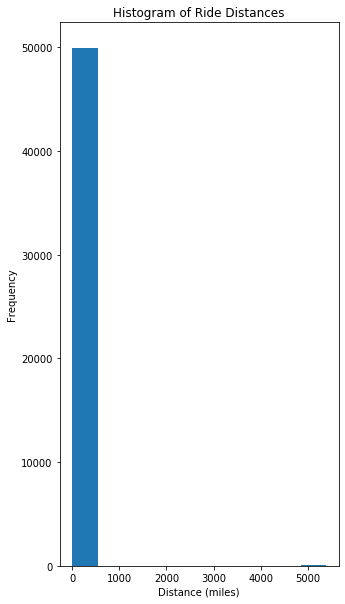

In [10]:
# now I can start some data exploration

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
plt.hist(taxi['distance'])
plt.grid(False)
plt.title('Histogram of Ride Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

In [12]:
outliers = taxi_new['distance'] > 4000
taxi_new[outliers].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,month,day,hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2,5385.831698,02,22,22
1260,2011-03-10 20:25:00.00000049,5.7,2011-03-10 20:25:00 UTC,-73.973907,40.754743,0.000000,0.000000,2,5384.555856,03,10,20
2397,2012-06-24 17:11:10.0000001,45.0,2012-06-24 17:11:10 UTC,0.000000,0.000000,-74.010230,40.714553,2,5385.927715,06,24,17
4278,2015-04-07 23:33:02.0000005,7.0,2015-04-07 23:33:02 UTC,-73.972702,40.757423,0.000000,0.000000,1,5384.527286,04,07,23
4597,2010-03-30 07:12:00.000000158,6.9,2010-03-30 07:12:00 UTC,0.000000,0.000000,-73.989693,40.754280,1,5385.364617,03,30,07


In [13]:
# to account for mis-entered information, I will remove entries that are out of the following bounds

taxi_new = taxi_new.drop(taxi_new[taxi_new.pickup_latitude < 30].index)
taxi_new = taxi_new.drop(taxi_new[taxi_new.dropoff_latitude < 30].index)
taxi_new = taxi_new.drop(taxi_new[taxi_new.dropoff_longitude > -65].index)
taxi_new = taxi_new.drop(taxi_new[taxi_new.pickup_longitude > -65].index)

Text(0, 0.5, 'Frequency')

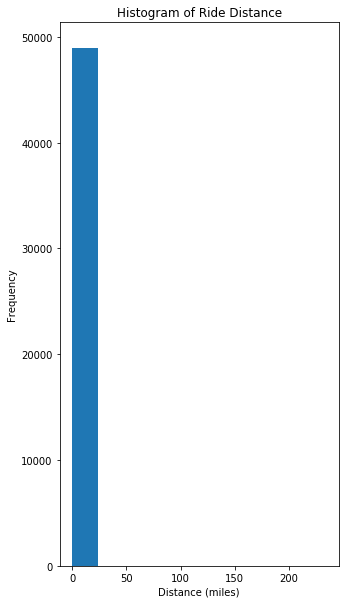

In [14]:
# let's see how this affected the distribution

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
plt.hist(taxi_new['distance'])
plt.grid(False)
plt.title('Histogram of Ride Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

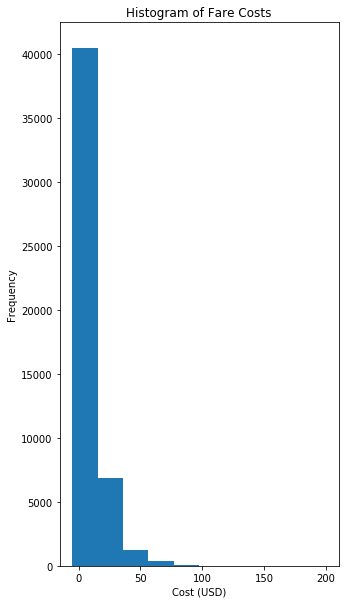

In [15]:
# here is a histogram of ride fare costs

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
plt.hist(taxi_new['fare_amount'])
plt.grid(False)
plt.title('Histogram of Fare Costs')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')

In [16]:
# since both attributes are still heavily skewed after data cleaning, log transformations will be applied

def log_transformation(data):
    return data.apply(np.log1p)

taxi_new['distance_log1p'] = log_transformation(taxi_new['distance'])
taxi_new['fare_amount_log1p'] = log_transformation(taxi_new['fare_amount'])

Text(0, 0.5, 'Frequency')

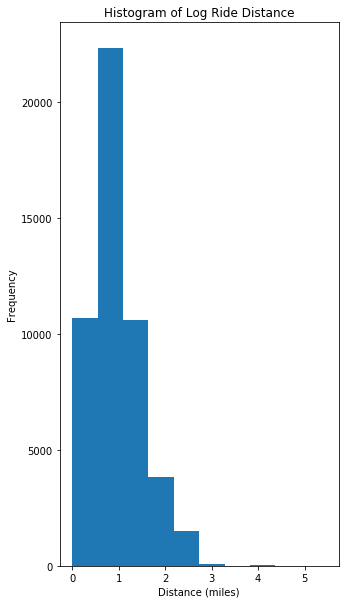

In [17]:
# once again, let's see how that affected the distribution

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
plt.hist(taxi_new['distance_log1p'])
plt.grid(False)
plt.title('Histogram of Log Ride Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

/Users/jckett/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jckett/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

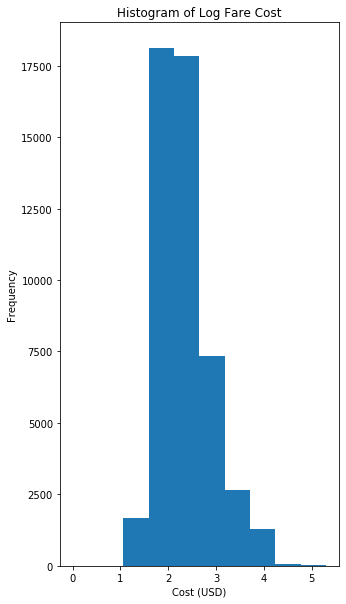

In [18]:
# similarly, we will see how it affect the fare costs

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
plt.hist(taxi_new['fare_amount_log1p'])
plt.grid(False)
plt.title('Histogram of Log Fare Cost')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')

In [19]:
# now that the data looks how we want it to, I will remove any columns I don't need 

taxi_new = taxi_new.drop(['key','fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)
taxi_new.head()

,passenger_count,distance,month,day,hour,distance_log1p,fare_amount_log1p
0,1,0.639764,06,15,17,0.494552,1.704748
1,1,5.246511,01,05,16,1.832023,2.884801
2,2,0.863167,08,18,00,0.622278,1.902108
3,1,1.737223,04,21,04,1.006944,2.163323
4,1,1.241710,03,09,07,0.807239,1.840550


In [20]:
# to avoid issues with predictions, all entries with null or 0 values will be removed
taxi_new = taxi_new.dropna()
taxi_new = taxi_new[~(taxi_new == 0).any(axis=1)]

In [21]:
# this identifies which attributes are predictors and which is the outcome 
# I chose to select this using index values, but they can also be selected using column names 

X = taxi_new.iloc[:, 0:6].values
y = taxi_new.iloc[:, 6].values

In [22]:
# this creates the training and testing split set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# to ensure the two sets were correctly created, we can check the shape of all four

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (33789, 6)
Training Labels Shape: (33789,)
Testing Features Shape: (14481, 6)
Testing Labels Shape: (14481,)


In [24]:
# this creates, fits, and predicts a random forest regressor on the training and test sets

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [25]:
# this calculates the accuracy of the model 

# Calculate mean absolute percentage error (MAPE)
errors = abs(y_pred - y_test)

mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', accuracy)

Accuracy: 91.75795949076542


In [26]:
# let's change this into a classification problem
# first we need to turn the continuous fare cost attribute into a binary one 

def label_fare(row):
   if row['fare_amount_log1p'] > 3:
      return 'high'
    
   if row['fare_amount_log1p'] < 3:
      return 'low'

In [27]:
# this applies the function we just created to every row in the dataset and adds the results as a new column

taxi_new['new_fare'] = taxi_new.apply (lambda row: label_fare(row), axis=1)
taxi_new.head()

,passenger_count,distance,month,day,hour,distance_log1p,fare_amount_log1p,new_fare
0,1,0.639764,06,15,17,0.494552,1.704748,low
1,1,5.246511,01,05,16,1.832023,2.884801,low
2,2,0.863167,08,18,00,0.622278,1.902108,low
3,1,1.737223,04,21,04,1.006944,2.163323,low
4,1,1.241710,03,09,07,0.807239,1.840550,low


In [28]:
# once again, we need to specify the predictor attributes and the outcome one

X2 = taxi_new.iloc[:, 0:6].values
y2 = taxi_new.iloc[:, 7].values

In [29]:
# this creates the training and testing sets

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

# this creates, fits, and predicts using a random forest classifier 

from sklearn.ensemble import RandomForestClassifier

regressor2 = RandomForestClassifier(n_estimators=200, random_state=0)

regressor2.fit(X_train2, y_train2)
y_pred2 = regressor2.predict(X_test2)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy:', accuracy_score(y_test2, y_pred2))

Accuracy: 0.9541468130653961
